In [2]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
matFilename = './Data/2017-05-12_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

In [5]:
f

<HDF5 file "2017-05-12_batchdata_updated_struct_errorcorrect.mat" (mode r)>

In [6]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [7]:
batch = f['batch']

In [8]:
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [32]:
batch['cycle_life']

<HDF5 dataset "cycle_life": shape (46, 1), type "|O">

In [33]:
batch['cycle_life'][0]

array([<HDF5 object reference>], dtype=object)

In [35]:
batch['cycle_life'][0,0]

<HDF5 object reference>

In [38]:
type(batch['cycle_life'][0,0].)

h5py.h5r.Reference

In [43]:
np.squeeze(f[batch['cycle_life'][2,0]])

array(1177.)

In [46]:
np.squeeze(f[batch['cycle_life'][2,0]]).tobytes()

b'\x00\x00\x00\x00\x00d\x92@'

In [41]:
np.squeeze(f[batch['cycle_life'][2,0]]).item()

1177.0

In [17]:
print(f[batch['cycle_life'][0,0]])

<HDF5 dataset "0c": shape (1, 1), type "<f8">


In [48]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
#     cl = f[batch['cycle_life'][i,0]].value
    cl = np.squeeze(f[batch['cycle_life'][i,0]]).item()
#     policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
    policy = np.squeeze(f[batch['policy_readable'][i,0]]).tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
#         I = np.hstack((f[cycles['I'][j,0]].value))
#         Qc = np.hstack((f[cycles['Qc'][j,0]].value))
#         Qd = np.hstack((f[cycles['Qd'][j,0]].value))
#         Qdlin = np.hstack((f[cycles['Qdlin'][j,0]].value))
#         T = np.hstack((f[cycles['T'][j,0]].value))
#         Tdlin = np.hstack((f[cycles['Tdlin'][j,0]].value))
#         V = np.hstack((f[cycles['V'][j,0]].value))
#         dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]].value))
#         t = np.hstack((f[cycles['t'][j,0]].value))
        I = np.hstack((np.squeeze(f[cycles['I'][j,0]])))
        Qc = np.hstack((np.squeeze(f[cycles['Qc'][j,0]])))
        Qd = np.hstack((np.squeeze(f[cycles['Qd'][j,0]])))
        Qdlin = np.hstack((np.squeeze(f[cycles['Qdlin'][j,0]])))
        T = np.hstack((np.squeeze(f[cycles['T'][j,0]])))
        Tdlin = np.hstack((np.squeeze(f[cycles['Tdlin'][j,0]])))
        V = np.hstack((np.squeeze(f[cycles['V'][j,0]])))
        dQdV = np.hstack((np.squeeze(f[cycles['discharge_dQdV'][j,0]])))
        t = np.hstack((np.squeeze(f[cycles['t'][j,0]])))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b1c' + str(i)
    bat_dict[key]=   cell_dict

In [49]:
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9', 'b1c10', 'b1c11', 'b1c12', 'b1c13', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c22', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

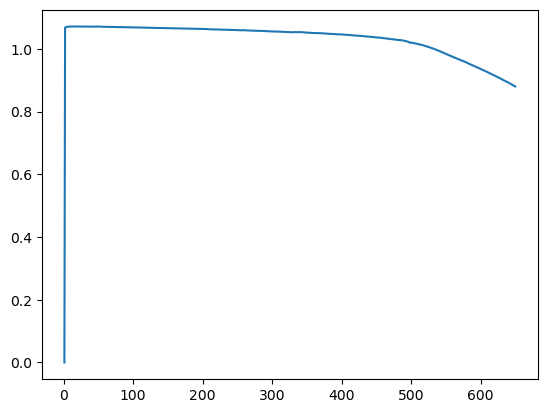

In [50]:
plt.plot(bat_dict['b1c43']['summary']['cycle'], bat_dict['b1c43']['summary']['QD'])

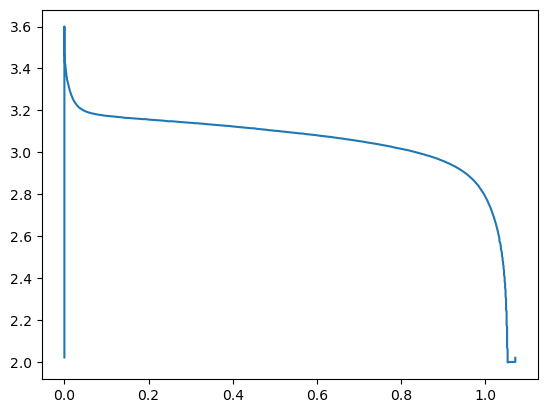

In [51]:
plt.plot(bat_dict['b1c43']['cycles']['10']['Qd'], bat_dict['b1c43']['cycles']['10']['V'])

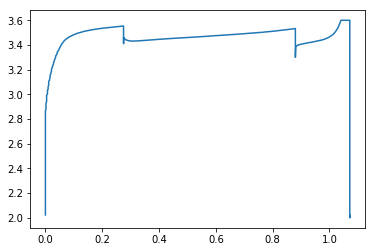

In [23]:
plt.plot(bat_dict['b1c43']['cycles']['10']['Qd'], bat_dict['b1c43']['cycles']['10']['V'])

In [52]:
with open('batch1.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)